In [19]:
import polars as pl
df = pl.read_parquet("C:/quant/data/data_test/btcusdt_thresh0.001_hybrid.parquet")


In [21]:
df

timestamp,px,sum_buy_sz,sum_sell_sz,ts_duration,px_pct,bs_imbalance,sum_open_interest,raw_factor_oi_change_sum,raw_factor_oi_change_sum_long_term,raw_factor_short_term_oi_volatility,raw_factor_long_term_oi_volatility,raw_factor_short_term_oi_trend,raw_factor_long_term_oi_trend,raw_factor_sentiment_net,z_factor_oi_change,z_factor_oi_change_long_term,z_factor_short_term_oi_volatility,z_factor_long_term_oi_volatility,z_factor_short_term_oi_trend,z_factor_long_term_oi_trend,z_factor_sentiment_net,impact_price_pct_ask_imn,impact_price_pct_bid_imn,far_bid_price,far_ask_price,best_bid_price,best_ask_price,real_bid_amount_sum,real_ask_amount_sum
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1750523525933,103589.9,0.0,0.002,1.7505e12,1.0,-0.002,76393.053,-0.003086,-0.015241,0.000431,0.000772,76513.484917,77114.981375,0.112667,-0.233488,-1.743164,-0.592615,0.381918,-1.507983,-2.572027,-0.846355,0.0,0.0,103584.0,103593.8,103589.9,103590.0,0.095,1.387
1750523669233,103486.4,20.534,67.974,143300.0,-0.001,-47.44,76393.053,-0.003086,-0.015241,0.000431,0.000772,76513.484917,77114.981375,0.112867,-0.233488,-1.743164,-0.592615,0.381918,-1.507983,-2.572027,-0.829055,0.0,9.6631e-7,103481.4,103490.8,103486.3,103486.4,3.235,5.157
1750526965923,103382.8,709.371,835.722,3.29669e6,-0.001002,-126.351,76326.993,-0.00097,-0.016148,0.000258,0.000755,76355.372167,76952.383905,0.113133,0.577031,-1.288101,-0.915776,-0.025392,-1.348052,-2.557946,-0.685828,0.0,0.0,103378.7,103386.7,103383.2,103383.3,1.589,10.557
1750527064558,103279.5,25.69,143.815,98635.0,-0.001,-118.125,76326.993,-0.00097,-0.016148,0.000258,0.000755,76355.372167,76952.383905,0.113133,0.577031,-1.288101,-0.915776,-0.025392,-1.348052,-2.557946,-0.685828,0.0,0.000002,103275.9,103282.1,103279.7,103279.8,0.074,32.741
1750527598030,103176.3,409.794,582.702,533472.0,-0.001,-172.908,76271.271,-0.001536,-0.016585,0.000326,0.000758,76340.246917,76926.512016,0.1122,0.40573,-1.290976,-0.718887,-0.0323,-1.321575,-2.551816,-0.755099,0.0,0.0,103178.6,103186.1,103182.4,103182.5,6.71,1.76
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1750585816597,102253.6,550.06,527.499,913800.0,-0.001001,22.561,75852.837,-0.003064,0.006337,0.00062,0.001221,76024.411417,75876.071038,0.1086,-1.122179,-0.274906,-0.600519,-1.525052,0.966104,1.210546,0.228551,0.0,0.0,102249.9,102258.2,102254.1,102254.2,6.799,3.095
1750585979891,102151.2,140.554,238.667,163294.0,-0.001002,-98.113,75791.716,-0.00427,0.005499,0.000602,0.001225,75997.367083,75883.836925,0.108733,-1.353922,-0.422862,-0.606134,-1.459153,0.833506,1.213884,0.331617,0.0,9.7888e-7,102150.1,102161.7,102157.3,102157.4,0.771,7.797
1750586025145,102048.9,54.641,145.545,45254.0,-0.001002,-90.904,75791.716,-0.00427,0.005499,0.000602,0.001225,75997.367083,75883.836925,0.108733,-1.353922,-0.422862,-0.606134,-1.459153,0.833506,1.213884,0.331617,0.0,0.0,102046.7,102054.2,102050.0,102050.1,0.58,16.839


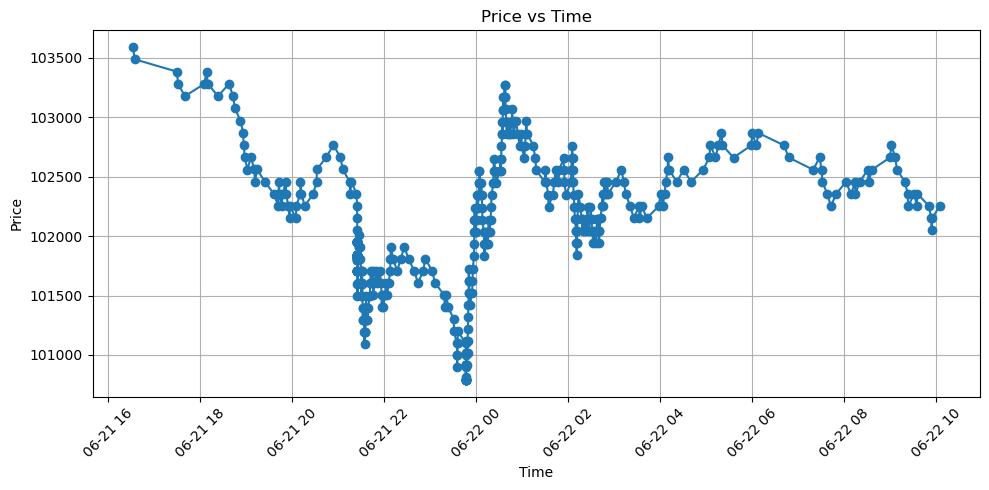

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

pdf = df.to_pandas()
pdf["timestamp"] = pd.to_datetime(pdf["timestamp"], unit="ms")

# 画图
plt.figure(figsize=(10, 5))
plt.plot(pdf["timestamp"], pdf["px"], marker='o', linestyle='-')
plt.title("Price vs Time")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

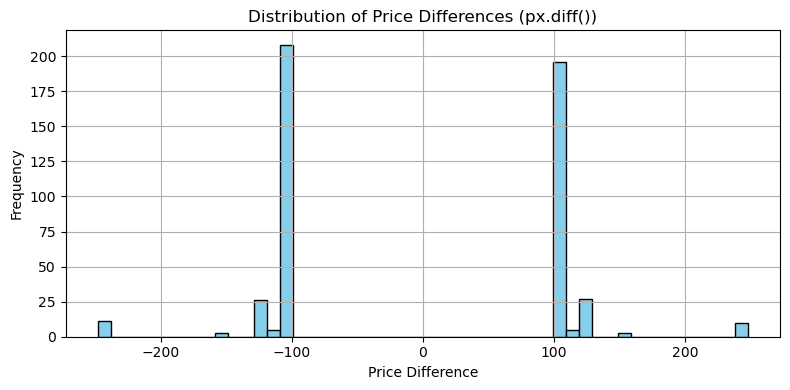

In [25]:
pdf = df.to_pandas()
pdf["timestamp"] = pd.to_datetime(pdf["timestamp"], unit="ms")

# 计算价差（价格一阶差分）
pdf["px_diff"] = pdf["px"].diff()

# 绘制直方图
plt.figure(figsize=(8, 4))
plt.hist(pdf["px_diff"].dropna(), bins=50, color="skyblue", edgecolor="k")
plt.title("Distribution of Price Differences (px.diff())")
plt.xlabel("Price Difference")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

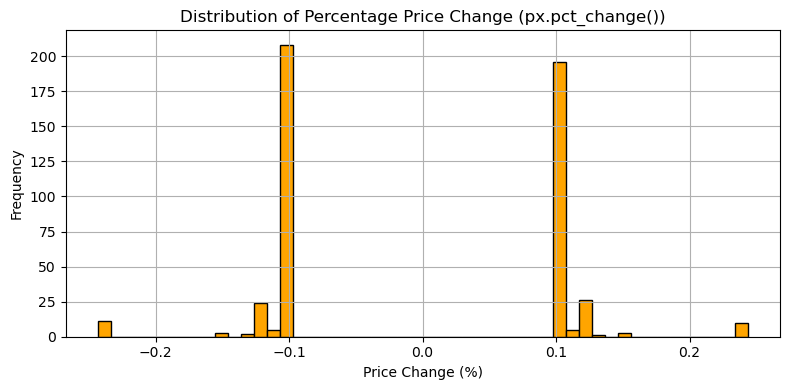

In [29]:
pdf = df.to_pandas()
pdf["timestamp"] = pd.to_datetime(pdf["timestamp"], unit="ms")

# 计算百分比变化（return）
pdf["px_pct"] = pdf["px"].pct_change()

# 绘图
plt.figure(figsize=(8, 4))
plt.hist(pdf["px_pct"].dropna() * 100, bins=50, color="orange", edgecolor="k")
plt.title("Distribution of Percentage Price Change (px.pct_change())")
plt.xlabel("Price Change (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()